# Project: A Look at West African GDP Forty years since Independence
By: Bethany Goss

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset we are working with is labeled "income" under Gapminder's downloadable data section. "Income" is based on GDP per capita taking into account Purchasing Power based on 2011 international dollars. It covers 194 countries from the years 1799 to 2039. This dataset is compiled from a few different sources the most influential being the Maddison Project Database for their computations and also the records they held onto from the Penn World Table. Clearly, the information from 2020 onward is based on predictive modeling. Specifically, a 2% increase in GDP globally. 

We will be looking at the West African region from 1975 (when the last country in the region gained independence) to 2015. This discussion will center around West African trends versus global trends as well as a look at specific countries in the region to see if there are any outliers over this forty-one year period. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib  inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df=pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")

In [3]:
#first I will create a dataframe with just the West African region, then specify by year. 
westAfrica=["Benin", "Burkina Faso", "Cape Verde", "Cote d'Ivoire", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Mauritania", "Niger", "Nigeria", "Senegal", "Sierra Leone", "Togo"]
df_westAfrica = df[df["country"].isin(westAfrica)]
df_westAfrica=df_westAfrica.loc[:, "1975":"2015"]
#df_westAfrica.info()

In [4]:
#this is the dataframe for the specified years, globally
df_global=df.loc[:, "1975":"2015"]
#df_global.info()

### Data Cleaning
Right now I have two sets of data, one is the global set, and the other is the West African set. I'll be adding the country names back to the sets so that, when the data is mapped, it becomes more clear what we are looking at. 
Also, the numbers in the dataframe are objects ending in the letter "k". I will be replacing the "k" with "000" and turn the datatype to "float64". 

In [23]:
#I'm renaming the indexes of the rows to show more clearly on the inline plots
df_westAfrica.rename(index={13:"Benin", 14:"Bukina_Faso", 33:"Cape_Verde", 39:"Cote_d'Ivoire", 63:"Gambia", 64:"Ghana", 65:"Guinea", 66:"Guinea-Bissau", 98:"Liberia", 114:"Mali", 120:"Mauritania", 125:"Niger", 126:"Nigeria", 151:"Senegal", 154:"Sierra_Leone", 169:"Togo"}, inplace=True)
#df_westAfrica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Benin to Togo
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1975    16 non-null     float64
 1   1976    16 non-null     float64
 2   1977    16 non-null     float64
 3   1978    16 non-null     float64
 4   1979    16 non-null     float64
 5   1980    16 non-null     float64
 6   1981    16 non-null     float64
 7   1982    16 non-null     float64
 8   1983    16 non-null     float64
 9   1984    16 non-null     float64
 10  1985    16 non-null     float64
 11  1986    16 non-null     float64
 12  1987    16 non-null     float64
 13  1988    16 non-null     float64
 14  1989    16 non-null     float64
 15  1990    16 non-null     float64
 16  1991    16 non-null     float64
 17  1992    16 non-null     float64
 18  1993    16 non-null     float64
 19  1994    16 non-null     float64
 20  1995    16 non-null     float64
 21  1996    16 non-null     float64
 22  199

In [6]:
#I am replacing the "k"s and changing the datatype, then checking my work.
df_westAfrica.replace("\.", "", inplace=True, regex=True)
df_westAfrica.replace("k$", "000", inplace=True, regex=True)
df_westAfrica=df_westAfrica.astype('float64')
#df_westAfrica.info()

In [7]:
#repeating what I did with the West African database
df_global.rename(index=df["country"], inplace=True)

In [8]:
df_global.replace("\.", "", inplace=True, regex=True)
df_global.replace("k$", "000", inplace=True, regex=True)
df_global=df_global.astype('float64')
#df_global.info()

<a id='eda'></a>
## Exploratory Data Analysis

Research Question 1: How does West Africa compare to global trends? 

In [9]:
df_global.describe()

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,60992.605128,67178.266667,69039.764103,72531.517949,73674.261538,71020.000000,76318.328205,74822.215385,73861.087179,78497.625641,...,142502.717949,133667.276923,135126.379487,132285.471795,126518.348718,139115.846154,142643.738462,144276.723077,144685.164103,150778.779487
std,106392.231562,110498.220573,111204.870473,115389.442546,120772.257792,116276.879549,118089.212356,128407.140842,120491.957814,124003.881266,...,205345.002714,199580.442690,189230.526969,186558.037841,168426.072829,185888.209960,186531.953542,183807.864413,188334.321821,190648.800941
min,423.000000,414.000000,407.000000,401.000000,405.000000,406.000000,389.000000,357.000000,346.000000,312.000000,...,615.000000,615.000000,615.000000,614.000000,614.000000,616.000000,619.000000,621.000000,623.000000,625.000000
25%,2425.000000,2360.000000,2495.000000,2395.000000,2360.000000,2420.000000,2420.000000,2445.000000,2405.000000,2425.000000,...,3175.000000,3240.000000,3310.000000,3370.000000,3450.000000,3575.000000,3660.000000,3625.000000,3535.000000,3580.000000
50%,5200.000000,5220.000000,5760.000000,5680.000000,5370.000000,5450.000000,5490.000000,5750.000000,6100.000000,5910.000000,...,9310.000000,9630.000000,9600.000000,9940.000000,11000.000000,18000.000000,41000.000000,82000.000000,64000.000000,105000.000000
75%,108500.000000,121000.000000,129500.000000,123000.000000,130000.000000,122000.000000,133000.000000,130000.000000,132000.000000,127000.000000,...,231500.000000,197000.000000,221500.000000,207500.000000,205500.000000,226000.000000,217500.000000,241500.000000,234000.000000,239500.000000
max,578000.000000,623000.000000,616000.000000,612000.000000,866000.000000,672000.000000,613000.000000,906000.000000,854000.000000,764000.000000,...,979000.000000,949000.000000,891000.000000,917000.000000,825000.000000,895000.000000,907000.000000,923000.000000,937000.000000,939000.000000


In [10]:
df_westAfrica.describe()

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.0000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.00000,16.000000
mean,1906.437500,1889.062500,1908.812500,1950.062500,1905.937500,1878.062500,1844.187500,1763.687500,1713.250000,1746.437500,...,2205.125000,2261.5625,2267.437500,2317.000000,2358.687500,2423.125000,2496.25000,2541.875000,2543.31250,2578.250000
std,1092.783173,1098.192786,1073.794469,1075.591029,1116.714256,1080.871282,1030.345846,957.113836,879.259347,906.500301,...,1378.986675,1440.8212,1435.202098,1462.179196,1507.689036,1516.573852,1533.54437,1557.306301,1568.69571,1566.468959
min,683.000000,715.000000,781.000000,771.000000,765.000000,779.000000,777.000000,749.000000,742.000000,817.000000,...,772.000000,815.0000,779.000000,812.000000,799.000000,860.000000,870.00000,900.000000,903.00000,912.000000
25%,1297.500000,1272.500000,1290.000000,1312.500000,1315.000000,1287.500000,1270.000000,1257.500000,1215.000000,1217.500000,...,1295.000000,1335.0000,1342.500000,1375.000000,1402.500000,1432.500000,1487.50000,1437.500000,1470.00000,1485.000000
50%,1500.000000,1465.000000,1495.000000,1460.000000,1430.000000,1465.000000,1480.000000,1395.000000,1455.000000,1505.000000,...,1720.000000,1745.0000,1730.000000,1745.000000,1770.000000,1795.000000,1805.00000,1855.000000,1890.00000,1990.000000
75%,2105.000000,2082.500000,2160.000000,2125.000000,2035.000000,2002.500000,1940.000000,1805.000000,1810.000000,1847.500000,...,2672.500000,2780.0000,2790.000000,2842.500000,2897.500000,2995.000000,3067.50000,3225.000000,3352.50000,3472.500000
max,4650.000000,4680.000000,4950.000000,4860.000000,5050.000000,5040.000000,4870.000000,4520.000000,4220.000000,4280.000000,...,5770.000000,6080.0000,5930.000000,5940.000000,6100.000000,6090.000000,6060.00000,6020.000000,6010.00000,6210.000000


In [11]:
#Finding the mean and the median of three years within our set that we will compare to show GDP trends over time. 
def finding_mean_and_median(dataframe, columnName):
        dataframe_name=str(dataframe)
        return "The mean is {}, and the median is {}.".format(dataframe[columnName].mean(), dataframe[columnName].median())
finding_mean_and_median(df_global, "1975")

'The mean is 60992.60512820513, and the median is 5200.0.'

In [12]:
finding_mean_and_median(df_global, "1995")

'The mean is 95402.95897435897, and the median is 6460.0.'

In [13]:
finding_mean_and_median(df_global, "2015")

'The mean is 150778.77948717948, and the median is 105000.0. '

In [14]:
finding_mean_and_median(df_westAfrica, "1975")

'The mean is 1906.4375, and the median is 1500.0.'

In [15]:
finding_mean_and_median(df_westAfrica, "1995")

'The mean is 1749.125, and the median is 1490.0.'

In [16]:
finding_mean_and_median(df_westAfrica, "2015")

'The mean is 2578.25, and the median is 1990.0.'

When comparing the means and medians of both groups over the decade, there is a sustained positive difference between the actual average and the center of the data. This difference is larger with the global set than with the West African set, which may indicate a more normal distribution for the West African region. 

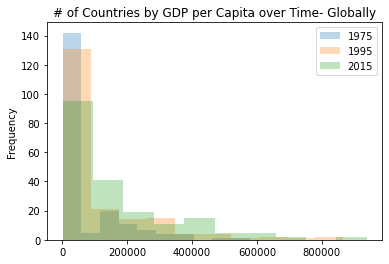

In [20]:
#comparing global GDP per capita trends over time
df_global["1975"].plot(kind="hist", legend=True, alpha=0.3, title="# of Countries by GDP per Capita over Time- Globally")
df_global["1995"].plot(kind="hist", alpha=0.3, legend=True)
df_global["2015"].plot(kind="hist", alpha=0.3, legend=True);

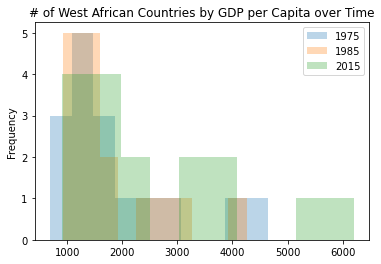

In [21]:
#Comparing GDP per capita of West Afrian countries over time
df_westAfrica["1975"].plot(kind="hist", alpha=0.3, legend=True, title="# of West African Countries by GDP per Capita over Time")
df_westAfrica["1985"].plot(kind="hist", alpha=0.3, legend=True)
df_westAfrica["2015"].plot(kind="hist", alpha=0.3, legend=True);

As you can see from the graphs, throughout these 41 year period, there was an increase in income. The global data skews to the right more than the West African set indicating that its range is greater than the West African dataframe. The West African data is still skewed to the right, but its variance isn't as great as the global dataframe. 

Both histograms show an increase in GDP per capita when controlling for purchasing power parity over time. This increase appears more dramatic on the global set. 


Research Question 2: Are there any outliers within the West African dataset that could use further exploration? 

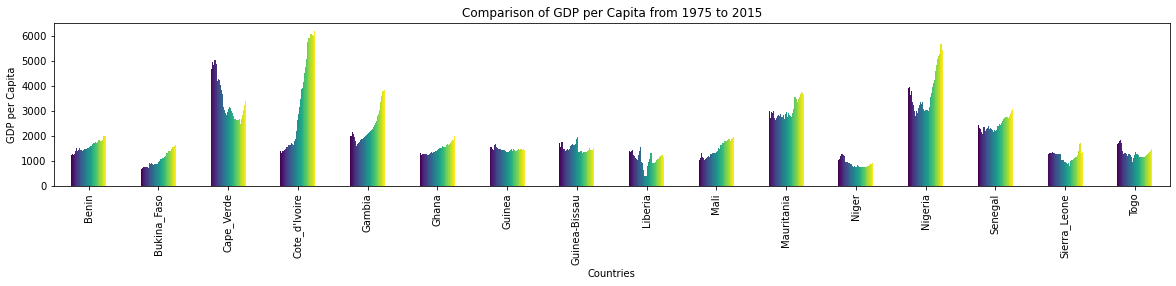

In [24]:
#Let's look at West Africa alone!,
plt.rcParams["figure.figsize"] = (20,3)
df_westAfrica.plot(kind="bar", legend=False, title="Comparison of GDP per Capita from 1975 to 2015", colormap="viridis", xlabel="Countries", ylabel="GDP per Capita");

From this graph, we can see that there are a few countries that could use some more investigation. Specifically, Cape Verde, Cote d'Ivoire, and Nigeria appear to have significant economic activity per capita. All but Cape Verde show a recent increase in income in 2015. There are a few other countries showing that same positive correlation between time and GDP as well but none increasing past 4,000.00. There are a few where time and GDP does not correlate positively, such as Niger and Liberia. 

<a id='conclusions'></a>
## Conclusions

The global dataset is skewed more to the right, showing a greater range of GDP per capita than the West African set. This can also be noted in the difference between the median and the mean from 1975:2015. The global set shows a larger range of GDP from 312 to 998,000 in international dollars. Meanwhile, the West African set is closer in range: 389 to 62100. None of the countries in this set increase past 6,300 in 2011 international dollars. This shows that West Africa is a smaller set of the global data set and does not follow the same trend lines as the global set does. 

When looking at the countries in the West African region, we can see there tends to be a positive correlation between time and GDP per capita. There are a few countries where this is not the case, such as Niger and Liberia. There are also outliers in terms of GDP per capita where both Cape Verde and Cote d'Ivoire seem to be doing very well when compared to their counterparts. 


Limitations:

The problems with the dataset are that it only looks at GPD per capita compared to time so its usefulness is limited until combined with other information. Also, some of the information is extrapolated and not necessarily an accurate reflection of realworld circumstances. 
